In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm

from pipeline import SearchEngine
from relevance import run_relevance_tests
from cf import CFRanker
from l2r import L2RRanker, L2RFeatureExtractor
from vector_ranker import VectorRanker

/home/zim/.virtualenvs/SI650/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_PATH = '../data/'
RELEVANCE_TEST_PATH = DATA_PATH + 'relevance.test.csv'

In [3]:
search_engine = SearchEngine()

Loading indexes...
Loading ranker...
Search Engine initialized!


/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:36: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  self.main_index = pd.read_csv(DATASET_PATH)


In [7]:
search_engine.set_reranker('vector')
query = '42.331698, -83.070267'
res = search_engine.pipeline.query(query, user_id=1)
search_engine.get_station_info([int(x) for x in res])

/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:105: DtypeWarning: Columns (10,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  detailed_data = pd.read_csv('../data/NREL_All_Stations_data_si618.csv', delimiter='\t')


,Station Name,Street Address,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,...,EV Connector Types,Access Code,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
3356,Wayne State University - Parking Structure #7,3717 John R,E,NaN,Public,Garage business hours,NaN,NaN,1.0,NaN,...,J1772,public,NaN,COLLEGE_CAMPUS,Free,NaN,False,NaN,LD,False
62525,LVB CHARGER 1,4723 Grand River Ave,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
16148,BEDROCK QL DATA CTR S-2,1401 Rosa Parks Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
52366,HOTEL CHARGERS HOTEL #1,2901 Grand River Ave,E,NaN,Public,Mon 12:00am - 12:00am; Tue 12:00am - 12:00am; ...,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
52367,HOTEL CHARGERS HOTEL #2,2901 Grand River Ave.,E,NaN,Public,Mon 12:00am - 12:00am; Tue 12:00am - 12:00am; ...,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
502,MGM Casino - Public Parking Structure,1777 3rd St,E,NaN,Public,24 hours daily,NaN,NaN,24.0,NaN,...,J1772,public,NaN,OTHER_ENTERTAINMENT,Free,NaN,False,NaN,LD,False
14683,BEDROCK ASSEMBLYGRG 3-1,1701 W Lafayette Blvd,T,2023-10-07,TEMPORARILY UNAVAILABLE (Public),24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25882,BEDROCK ASSEMBLYGRG 5-1,1701 W Lafayette Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25883,BEDROCK ASSEMBLYGRG 4-1,1701 W Lafayette Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14682,BEDROCK ASSEMBLYGRG 2-1,1701 W Lafayette Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [5]:
res = search_engine.pipeline.query(query, user_id=2)
search_engine.get_station_info([int(x) for x in res])

/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/pipeline.py:105: DtypeWarning: Columns (10,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  detailed_data = pd.read_csv('../data/NREL_All_Stations_data_si618.csv', delimiter='\t')


,Station Name,Street Address,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,...,EV Connector Types,Access Code,Access Detail Code,Facility Type,EV Pricing,EV On-Site Renewable Source,Restricted Access,NPS Unit Name,Maximum Vehicle Class,EV Workplace Charging
502,MGM Casino - Public Parking Structure,1777 3rd St,E,NaN,Public,24 hours daily,NaN,NaN,24.0,NaN,...,J1772,public,NaN,OTHER_ENTERTAINMENT,Free,NaN,False,NaN,LD,False
3356,Wayne State University - Parking Structure #7,3717 John R,E,NaN,Public,Garage business hours,NaN,NaN,1.0,NaN,...,J1772,public,NaN,COLLEGE_CAMPUS,Free,NaN,False,NaN,LD,False
62525,LVB CHARGER 1,4723 Grand River Ave,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
16148,BEDROCK QL DATA CTR S-2,1401 Rosa Parks Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
52366,HOTEL CHARGERS HOTEL #1,2901 Grand River Ave,E,NaN,Public,Mon 12:00am - 12:00am; Tue 12:00am - 12:00am; ...,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
52367,HOTEL CHARGERS HOTEL #2,2901 Grand River Ave.,E,NaN,Public,Mon 12:00am - 12:00am; Tue 12:00am - 12:00am; ...,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14683,BEDROCK ASSEMBLYGRG 3-1,1701 W Lafayette Blvd,T,2023-10-07,TEMPORARILY UNAVAILABLE (Public),24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25882,BEDROCK ASSEMBLYGRG 5-1,1701 W Lafayette Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
25883,BEDROCK ASSEMBLYGRG 4-1,1701 W Lafayette Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
14682,BEDROCK ASSEMBLYGRG 2-1,1701 W Lafayette Blvd,E,NaN,Public,24 hours daily,NaN,NaN,2.0,NaN,...,J1772,public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
overall_scores = []
user_ids = [51, 206, 49, 86, 52, 6, 141, 67, 66, 244]
user_ids_vector = [1, 2]

In [7]:
def log_scores(overall_scores, score, idx):
    for item in score['map_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'map'
        })
    for item in score['ndcg_list']:
        overall_scores.append({
            'model': idx, 
            'score': item,
            'metric': 'ndcg'
        })

In [8]:
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 0)

  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [9]:
search_engine.set_reranker('l2r')
score = run_relevance_tests(RELEVANCE_TEST_PATH, search_engine.pipeline)
log_scores(overall_scores, score, 1)

Loading l2r ranker...


4161it [00:00, 1055999.21it/s]
  0%|          | 0/268 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc[0], doc[1])).km)
100%|██████████| 268/268 [00:00<00:00, 423.67it/s]


Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 4161, number of used features: 14


  0%|          | 0/38 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/l2r.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future

In [10]:
search_engine.set_reranker('cf')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user)
    log_scores(overall_scores, score, 2)

/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:33: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv(


Loading cf ranker...


  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isnan(self.score_index.iloc[j][x]):
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [11]:
search_engine.set_reranker('l2r+cf')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user, threshold=0)
    log_scores(overall_scores, score, 3)

Loading l2r ranker...


4161it [00:00, 928472.57it/s]
  0%|          | 0/268 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:194: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc.Latitude, doc.Longitude)).km)
/home/zim/UMSI/PlugStation-Recommendation-System/src/ranker.py:196: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score = 1 / (1 + distance.distance((query_parts[0], query_parts[1]), (doc[0], doc[1])).km)
100%|██████████| 268/268 [00:00<00:00, 379.81it/s]
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:33: DtypeWarning: Colu

Training model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 850
[LightGBM] [Info] Number of data points in the train set: 4161, number of used features: 14


  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/cf.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [12]:
search_engine.set_reranker('vector')
for user in tqdm(user_ids):
    score = run_relevance_tests(
        RELEVANCE_TEST_PATH, search_engine.pipeline, 
        user_id=user, threshold=0)
    log_scores(overall_scores, score, 5)

  0%|          | 0/10 [00:00<?, ?it/s]/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(
/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [13]:
overall_scores = pd.DataFrame(overall_scores)
overall_scores

,model,score,metric
0,0,0.012500,map
1,0,0.000000,map
2,0,0.000000,map
3,0,0.000000,map
4,0,0.000000,map
...,...,...,...
2427,5,0.094526,ndcg
2428,5,0.000000,ndcg
2429,5,0.000000,ndcg
2430,5,0.000000,ndcg


/tmp/ipykernel_15502/333592774.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(models_list)


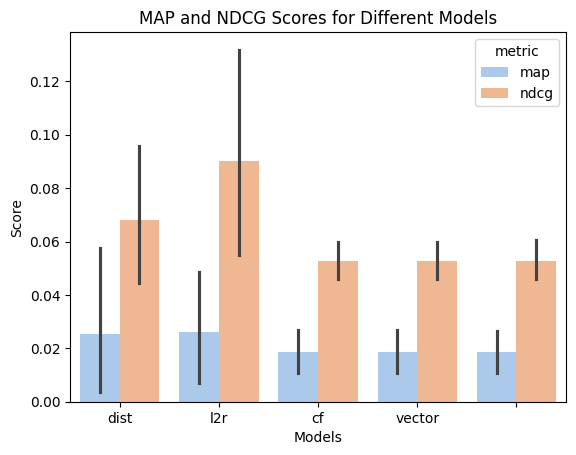

In [14]:
plot = sns.barplot(x='model', y='score', hue='metric',
                   data=overall_scores, palette='pastel')
models_list = ['dist', 'l2r', 'cf', 'vector']
plot.set_xticklabels(models_list)
plot.set_xlabel('Models')
plot.set_ylabel('Score')
plot.set_title('MAP and NDCG Scores for Different Models')
plt.show()

In [24]:
search_engine.pipeline.query(query, user_id=2)

/home/zim/UMSI/PlugStation-Recommendation-System/src/vector_ranker.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_docs['score'] = relevant_docs.apply(


[[33376.0, 0.8425116197190364],
 [36208.0, 0.5606987505293368],
 [12763.0, 0.530547044833828],
 [33378.0, 0.5048140302081581]]